In [9]:
from pycaret.classification import ClassificationExperiment
from sklearn.metrics import log_loss, classification_report

In [10]:
exp = ClassificationExperiment()


In [12]:
df_train = catalog.load('base_train')

[04/16/23 23:33:19] INFO     Loading data from 'base_train' (ParquetDataSet)...                 ]8;id=273851;file:///Users/walterpereira/projetcs/IA_infnet/eng-ml/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=858917;file:///Users/walterpereira/projetcs/IA_infnet/eng-ml/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [13]:
exp.setup(df_train, target='shot_made_flag')

,Description,Value
0,Session id,8197
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [14]:
exp.add_metric('logloss', 'Log Loss', log_loss, greater_is_better = False)

Name                                                       Log Loss
Display Name                                               Log Loss
Score Function                   <function log_loss at 0x136635700>
Scorer               make_scorer(log_loss, greater_is_better=False)
Target                                                         pred
Args                                                             {}
Greater is Better                                             False
Multiclass                                                     True
Custom                                                         True
Name: logloss, dtype: object

In [1]:
catalog.list()

['raw_data',
 'data_filtred',
 'base_train',
 'base_test',
 'lr_model',
 'best_model',
 'parameters',
 'params:list_of_columns_to_select',
 'params:test_size']

In [45]:
model_lr = exp.create_model('lr', verbose=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.5590,0.5721,0.4469,0.5405,0.4893,0.1073,0.1088,7.0309
1,0.5792,0.6064,0.4860,0.5637,0.5220,0.1499,0.1512,6.7082
2,0.6056,0.6163,0.5065,0.5978,0.5484,0.2026,0.2048,6.2871
3,0.5757,0.5823,0.4804,0.5597,0.5170,0.1426,0.1439,6.7643
4,0.5739,0.5878,0.4488,0.5618,0.4990,0.1364,0.1390,6.7924
5,0.5871,0.6085,0.5047,0.5717,0.5361,0.1668,0.1678,6.5818
6,0.5687,0.6006,0.4339,0.5561,0.4874,0.1248,0.1277,6.8766
7,0.5951,0.6208,0.4730,0.5893,0.5248,0.1793,0.1826,6.4555
8,0.5704,0.5842,0.4600,0.5551,0.5031,0.1306,0.1324,6.8485


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
predicted_ = exp.predict_model(model_lr, data = df_test,)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
0,Logistic Regression,0.5760,0.5945,0.4672,0.5919,0.5222,0.1506,0.1540,6.7589


In [ ]:
exp.get_metrics()

In [ ]:
log_loss(save['shot_made_flag'],save['prediction_label'])

In [ ]:
save['shot_made_flag']

In [ ]:
save = exp.predict_model(model_lr, data = df_test,)

In [62]:
best_md = exp.compare_models(verbose=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss,TT (Sec)
ada,Ada Boost Classifier,0.5912,0.5936,0.3677,0.6121,0.4590,0.1625,0.1762,6.5179,0.1990
gbc,Gradient Boosting Classifier,0.5900,0.5980,0.3783,0.6060,0.4656,0.1612,0.1730,6.5361,0.2710
lr,Logistic Regression,0.5795,0.5980,0.4710,0.5663,0.5141,0.1491,0.1511,6.7031,0.6400
ridge,Ridge Classifier,0.5774,0.0000,0.4731,0.5630,0.5140,0.1452,0.1470,6.7368,0.1260
lda,Linear Discriminant Analysis,0.5771,0.5993,0.4729,0.5625,0.5137,0.1445,0.1463,6.7424,0.1420
nb,Naive Bayes,0.5755,0.5967,0.5029,0.5564,0.5281,0.1442,0.1448,6.7677,0.1410
qda,Quadratic Discriminant Analysis,0.5728,0.6003,0.5142,0.5517,0.5321,0.1399,0.1403,6.8112,0.1320
lightgbm,Light Gradient Boosting Machine,0.5715,0.5882,0.4580,0.5567,0.5023,0.1325,0.1345,6.8308,0.2080
rf,Random Forest Classifier,0.5626,0.5755,0.5092,0.5393,0.5236,0.1199,0.1201,6.9740,0.4010
xgboost,Extreme Gradient Boosting,0.5611,0.5763,0.5206,0.5368,0.5284,0.1182,0.1183,15.8181,0.2550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
even_better_md = exp.tune_model(best_md, verbose=True)

In [ ]:
even_better_md

In [ ]:
best_md

In [ ]:
help(best_md)

In [51]:
report = classification_report(predicted_['shot_made_flag'],predicted_['prediction_label'],output_dict=True)

In [47]:
predicted_

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,prediction_label,prediction_score
19723,33.947300,-118.166801,1,4,0,14,0.0,0,0.5946
586,34.044300,-118.269798,7,2,0,0,1.0,1,0.5990
29355,33.940300,-118.098801,10,1,1,20,1.0,0,0.6349
8424,34.044300,-118.269798,2,4,0,0,1.0,1,0.5692
5848,34.044300,-118.269798,9,3,0,0,1.0,1,0.5894
...,...,...,...,...,...,...,...,...,...
10186,33.957298,-118.106796,10,1,0,18,1.0,0,0.6003
24516,33.970299,-118.191803,3,3,0,10,0.0,0,0.5335
5892,34.036301,-118.113800,11,2,0,15,0.0,0,0.5859
99,34.035301,-118.230797,11,3,0,4,0.0,1,0.5426


In [52]:
report

{'0.0': {'precision': 0.5658161198865937,
  'recall': 0.6831295843520783,
  'f1-score': 0.6189632255206026,
  'support': 2045},
 '1.0': {'precision': 0.5919395465994962,
  'recall': 0.4671968190854871,
  'f1-score': 0.5222222222222223,
  'support': 2012},
 'accuracy': 0.5760414099087996,
 'macro avg': {'precision': 0.578877833243045,
  'recall': 0.5751632017187827,
  'f1-score': 0.5705927238714124,
  'support': 4057},
 'weighted avg': {'precision': 0.5787715881011266,
  'recall': 0.5760414099087996,
  'f1-score': 0.5709861738478539,
  'support': 4057}}

In [59]:
prob = model_lr.predict_proba(df_test.drop(columns='shot_made_flag'))

In [55]:
df_test['shot_made_flag']

19723    0.0
586      1.0
29355    1.0
8424     1.0
5848     1.0
        ... 
10186    1.0
24516    0.0
5892     0.0
99       0.0
12111    1.0
Name: shot_made_flag, Length: 4057, dtype: float64

In [57]:
df_test

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
19723,33.9473,-118.1668,1,4,0,14,0.0
586,34.0443,-118.2698,7,2,0,0,1.0
29355,33.9403,-118.0988,10,1,1,20,1.0
8424,34.0443,-118.2698,2,4,0,0,1.0
5848,34.0443,-118.2698,9,3,0,0,1.0
...,...,...,...,...,...,...,...
10186,33.9573,-118.1068,10,1,0,18,1.0
24516,33.9703,-118.1918,3,3,0,10,0.0
5892,34.0363,-118.1138,11,2,0,15,0.0
99,34.0353,-118.2308,11,3,0,4,0.0


In [60]:
log_loss(df_test['shot_made_flag'],prob)

0.6799838503417804

In [61]:
best_md

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=1089)

In [ ]:
exp.evaluate_model(estimator = even_better_md)

In [2]:
model = catalog.load('best_model')

[04/16/23 23:29:17] INFO     Loading data from 'best_model' (MlflowMlflowModelSaverDataSet)...  ]8;id=778474;file:///Users/walterpereira/projetcs/IA_infnet/eng-ml/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=224578;file:///Users/walterpereira/projetcs/IA_infnet/eng-ml/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [21]:
%%capture save
exp.evaluate_model(estimator = model)

[04/16/23 23:41:19] WARNING  /Users/walterpereira/projetcs/IA_infnet/eng-ml/venv/lib/python3.9/site ]8;id=946148;file:///Users/walterpereira/projetcs/IA_infnet/eng-ml/venv/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=772146;file:///Users/walterpereira/projetcs/IA_infnet/eng-ml/venv/lib/python3.9/warnings.py#109\109]8;;\
                             -packages/sklearn/base.py:439: UserWarning: X does not have valid                     
                             feature names, but GradientBoostingClassifier was fitted with feature                 
                             names                                                                                 
                               warnings.warn(                                                                      
                                                                                                                   

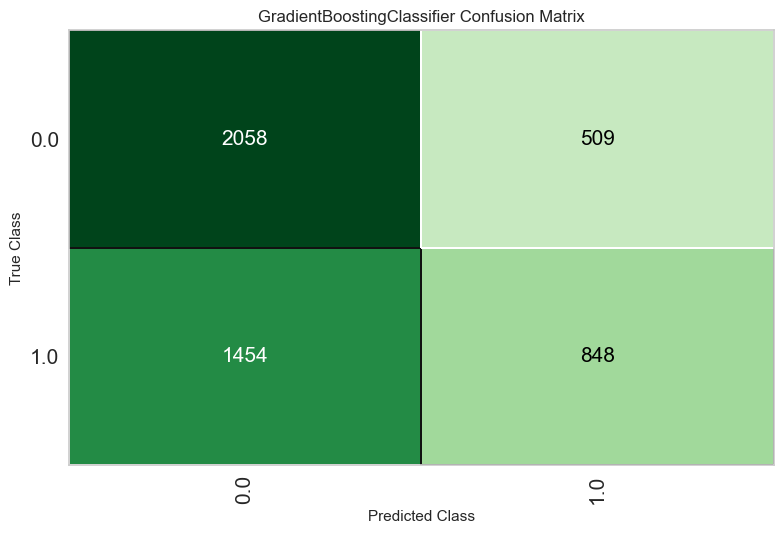

In [24]:
exp.plot_model(model, plot = 'confusion_matrix')